# Imports

In [62]:
from datasets import load_dataset
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yuliyaalyoshyna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yuliyaalyoshyna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuliyaalyoshyna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Experimenting with online database

In [63]:
dataset = load_dataset('sahil2801/CodeAlpaca-20k')
df = pd.DataFrame(dataset['train'])
df = df.dropna()

Found cached dataset json (/Users/yuliyaalyoshyna/.cache/huggingface/datasets/sahil2801___json/sahil2801--CodeAlpaca-20k-7d7cae91c903b889/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4)


  0%|          | 0/1 [00:00<?, ?it/s]

In [64]:
def detect_language(instruction, output):
    languages = {
        'sql': 'SQL',
        'python': 'Python',
        'java': 'Java',
        'c#': 'C#',
        'c++': 'C++',
        'jsx': 'JSX',
        'html': 'HTML',
        'ruby': 'Ruby',
        'php': 'PHP',
        'mysql': 'MYSQL',
        'shell':'shell',
        'c': 'C',
        'typescript': 'TypeScript',
        'css': 'CSS'
    }
    for lang, code in languages.items():
        if lang in instruction.lower():
            return code

    if re.search(r'\bSELECT\b|\bFROM\b|\bWHERE\b', output, re.IGNORECASE):
        return 'SQL'
    elif re.search(r'\bdef\b|\bimport\b|\bprint\b', output):
        return 'Python'
    elif re.search(r'\bclass\b|\bSystem\.out\.print\b|\bpublic\b', output):
        return 'Java'
    elif re.search(r'\busing\b|\bnamespace\b|\bConsole\.WriteLine\b', output):
        return 'C#'
    elif re.search(r'\b#include\b|\bstd::\b', output):
        return 'C++'
    elif re.search(r'\b{\b|\b}\b|;\b', output):
        return 'CSS'
    else:
        return 'Unknown'

In [65]:
df['language'] = df.apply(lambda x: detect_language(x['instruction'], x['output']), axis=1)

In [66]:
df

instruction  \
0      Create an array of length 5 which contains all...   
1      Formulate an equation to calculate the height ...   
2      Write a replace method for a string class whic...   
3      Create an array of length 15 containing number...   
4      Write a function to find the number of distinc...   
...                                                  ...   
20017  Identify and display all the data types within...   
20018  Create a basic Python script to accept two num...   
20019  Create a basic C# program to print out the cur...   
20020  Find and display all the employees who earn mo...   
20021  Create a Python program to accept a string fro...   

                                                   input  \
0                                                          
1                                                          
2      string = "Hello World!"\nreplace_with = "Greet...   
3                                                          
4      matrix = [[1, 0, 0],\n          [1, 0, 1],\n  ...   
...                                                  ...   
20017                                                      
20018                                                      
20019                                                      
20020                                                      
20021                                        Hello World   

                                                  output language  
0                                 arr = [2, 4, 6, 8, 10]        C  
1      Height of triangle = opposite side length * si...        C  
2      def replace(self, replace_with):\n    new_stri...        C  
3      arr = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33...        C  
4      def find_num_distinct_states(matrix):\n    sta...        C  
...                                                  ...      ...  
20017  SELECT DISTINCT data_type \nFROM products \nWH...        C  
20018  num1 = int(input("Enter the first number: "))\...   Python  
20019  using System;\n\npublic class Program \n{\n   ...       C#  
20020  SELECT e.name \nFROM employees e \nWHERE e.sal...        C  
20021  def countVowels(str): \n\tvowel = 0\n\tfor i i...   Python  

[20022 rows x 4 columns]

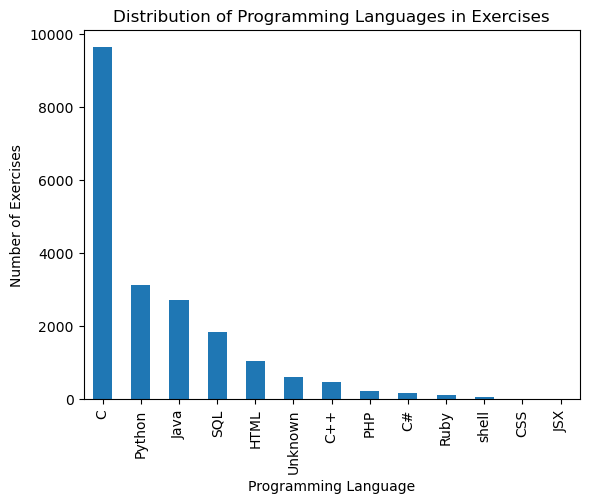

In [67]:
language_counts = df['language'].value_counts()
language_counts.plot(kind='bar')
plt.xlabel('Programming Language')
plt.ylabel('Number of Exercises')
plt.title('Distribution of Programming Languages in Exercises')
plt.show()

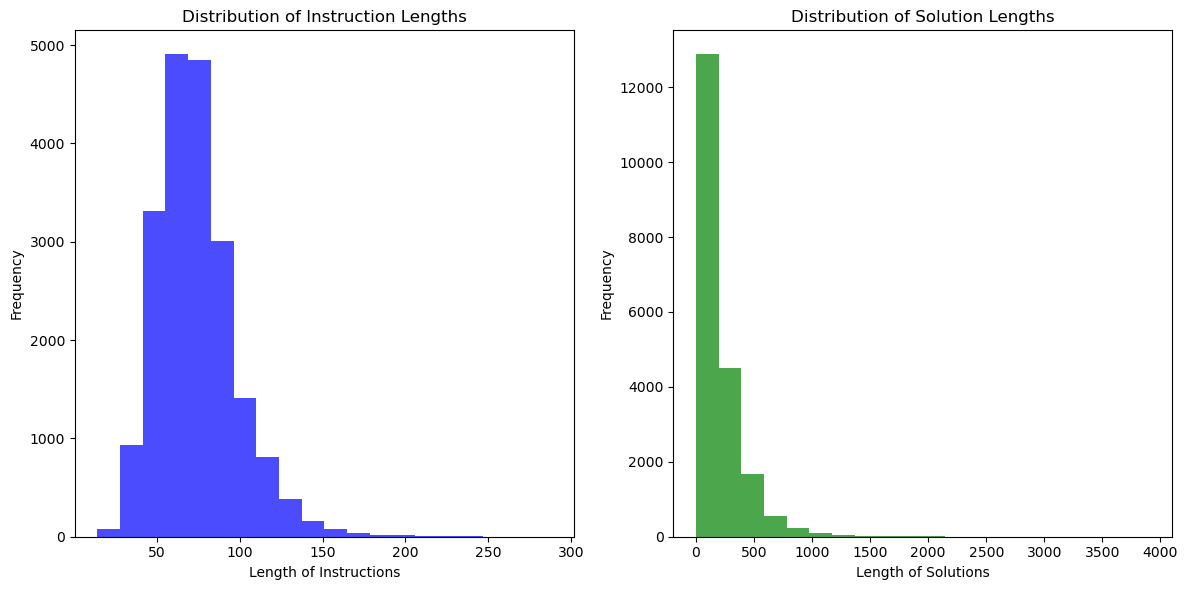

In [68]:
df['instruction_length'] = df['instruction'].apply(len)
df['output_length'] = df['output'].apply(len)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['instruction_length'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Length of Instructions')
plt.ylabel('Frequency')
plt.title('Distribution of Instruction Lengths')

plt.subplot(1, 2, 2)
plt.hist(df['output_length'], bins=20, color='green', alpha=0.7)
plt.xlabel('Length of Solutions')
plt.ylabel('Frequency')
plt.title('Distribution of Solution Lengths')

plt.tight_layout()
plt.show()

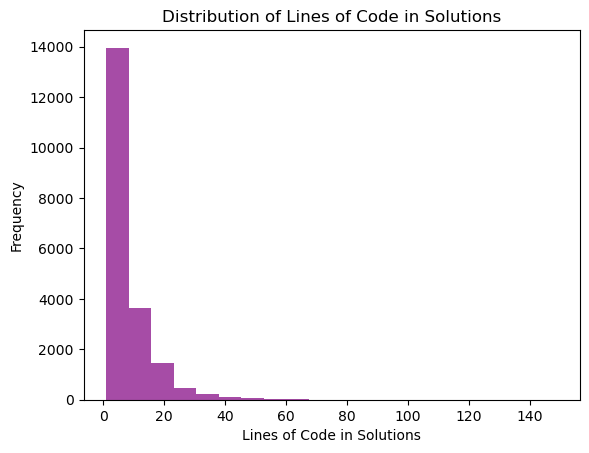

input
[1, 2, 3, 4, 5]            57
arr = [1, 2, 3, 4, 5]      34
n = 10                     30
n = 5                      28
[1, 2, 3, 4]               27
Hello World                25
string = "Hello World"     23
string = "Hello World!"    22
num = 5                    17
[1,2,3,4,5]                15
Name: count, dtype: int64


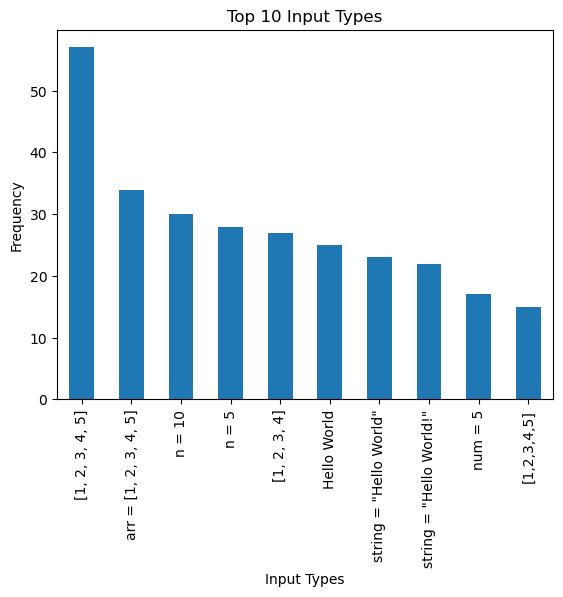

In [69]:
df['lines_of_code'] = df['output'].apply(lambda x: x.count('\n') + 1)
plt.hist(df['lines_of_code'], bins=20, color='purple', alpha=0.7)
plt.xlabel('Lines of Code in Solutions')
plt.ylabel('Frequency')
plt.title('Distribution of Lines of Code in Solutions')
plt.show()


df_filtered = df[df['input'] != '']
input_types = df_filtered['input'].value_counts()

print(input_types.head(10))
input_types.head(10).plot(kind='bar')
plt.xlabel('Input Types')
plt.ylabel('Frequency')
plt.title('Top 10 Input Types')
plt.show()

In [70]:
def preprocess_instruction(instruction):
    # Tokenize words
    tokens = word_tokenize(instruction.lower())
    # Remove stopwords, etc.
    processed_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    processed_instruction = ' '.join(processed_tokens)
    return processed_instruction


In [71]:
df['processed_instruction'] = df['instruction'].apply(preprocess_instruction)
instruction_counter = Counter(df['processed_instruction'])

# Get the most common instructions
most_common_instructions = instruction_counter.most_common(10)
print("Top 10 Most Common Instructions:")
for instruction, count in most_common_instructions:
    print(f"{instruction}: {count}")


Top 10 Most Common Instructions:
generate random number: 4
create loop print number: 3
generate random integer: 3
evaluate following expression: 3
create array element: 3
output following code: 2
write java program generate random number: 2
construct loop print number: 2
write program print prime number: 2
write code print prime number: 2


In [72]:
ngram_range = (2, 3)  # Bi-grams and tri-grams
vectorizer = CountVectorizer(preprocessor=preprocess_instruction, ngram_range=ngram_range)

# Fit and transform the instructions
instruction_vectors = vectorizer.fit_transform(df['instruction'])

# Get feature names (phrases)
feature_names = vectorizer.get_feature_names_out()

phrase_counts = instruction_vectors.sum(axis=0)
sorted_phrases = sorted(zip(feature_names, phrase_counts.flat), key=lambda x: x[1], reverse=True)

print("Top 10 Most Common Phrases in Instructions:")
for phrase, count in sorted_phrases[:10]:
    print(f"{phrase}: {count}")


Top 10 Most Common Phrases in Instructions:
sql query: 1147
create function: 840
write function: 780
write code: 742
given string: 733
write sql: 692
write sql query: 635
given list: 629
given array: 602
function take: 532


In [73]:
df

instruction  \
0      Create an array of length 5 which contains all...   
1      Formulate an equation to calculate the height ...   
2      Write a replace method for a string class whic...   
3      Create an array of length 15 containing number...   
4      Write a function to find the number of distinc...   
...                                                  ...   
20017  Identify and display all the data types within...   
20018  Create a basic Python script to accept two num...   
20019  Create a basic C# program to print out the cur...   
20020  Find and display all the employees who earn mo...   
20021  Create a Python program to accept a string fro...   

                                                   input  \
0                                                          
1                                                          
2      string = "Hello World!"\nreplace_with = "Greet...   
3                                                          
4      matrix = [[1, 0, 0],\n          [1, 0, 1],\n  ...   
...                                                  ...   
20017                                                      
20018                                                      
20019                                                      
20020                                                      
20021                                        Hello World   

                                                  output language  \
0                                 arr = [2, 4, 6, 8, 10]        C   
1      Height of triangle = opposite side length * si...        C   
2      def replace(self, replace_with):\n    new_stri...        C   
3      arr = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33...        C   
4      def find_num_distinct_states(matrix):\n    sta...        C   
...                                                  ...      ...   
20017  SELECT DISTINCT data_type \nFROM products \nWH...        C   
20018  num1 = int(input("Enter the first number: "))\...   Python   
20019  using System;\n\npublic class Program \n{\n   ...       C#   
20020  SELECT e.name \nFROM employees e \nWHERE e.sal...        C   
20021  def countVowels(str): \n\tvowel = 0\n\tfor i i...   Python   

       instruction_length  output_length  lines_of_code  \
0                      77             22              1   
1                     115             69              1   
2                     105            204              8   
3                      72             63              1   
4                      73            175              6   
...                   ...            ...            ...   
20017                  94             70              3   
20018                  88            211              8   
20019                  65            134              9   
20020                  96             86              3   
20021                 106            209             10   

                                   processed_instruction  
0               create array length contains even number  
1      formulate equation calculate height triangle g...  
2      write replace method string class replaces giv...  
3        create array length containing number divisible  
4      write function find number distinct state give...  
...                                                  ...  
20017  identify display data type within column table...  
20018  create basic python script accept two number u...  
20019     create basic c program print current date time  
20020  find display employee earn average salary acro...  
20021  create python program accept string user print...  

[20022 rows x 8 columns]

Analyze the complexity of solutions

In [74]:
def count_occurrences(text, pattern):
    return len(re.findall(pattern, text))

loop_pattern = r'for\s|\while\s'
conditional_pattern = r'\b(if|else|elif)\b'
function_call_pattern = r'\b\w+\(' 

# Filter DataFrame based on the detected language
df_filtered = df[df['language'].isin(['Python', 'Java', 'C#', 'C++', 'CSS'])]

# Count occurrences of structural elements in each solution
df_filtered['num_loops'] = df_filtered['output'].apply(lambda x: count_occurrences(x, loop_pattern))
df_filtered['num_conditionals'] = df_filtered['output'].apply(lambda x: count_occurrences(x, conditional_pattern))
df_filtered['num_function_calls'] = df_filtered['output'].apply(lambda x: count_occurrences(x, function_call_pattern))

average_loops = df_filtered['num_loops'].mean()
average_conditionals = df_filtered['num_conditionals'].mean()
average_function_calls = df_filtered['num_function_calls'].mean()

print(f"Average number of loops: {average_loops}")
print(f"Average number of conditionals: {average_conditionals}")
print(f"Average number of function calls: {average_function_calls}")


Average number of loops: 0.5686787804126886
Average number of conditionals: 0.588543270711426
Average number of function calls: 2.8124422543886665


/var/folders/4n/hgq5hq4j24j70lrtn8yxnf600000gn/T/ipykernel_5032/2234822892.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['num_loops'] = df_filtered['output'].apply(lambda x: count_occurrences(x, loop_pattern))
/var/folders/4n/hgq5hq4j24j70lrtn8yxnf600000gn/T/ipykernel_5032/2234822892.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['num_conditionals'] = df_filtered['output'].apply(lambda x: count_occurrences(x, conditional_pattern))
/var/folders/4n/hgq5hq4j24j70lrtn8yxnf60

# Experimenting with M2 week 1 exercises

In [75]:
data = pd.read_excel('M2_week1_exercises.xlsx')
data = data.rename(columns={'M2_week1_exercises': 'problem', 'Unnamed: 1': 'solution'})
data = data.iloc[1:]
data.reset_index(inplace=True)

In [76]:
data

index                                            problem  \
0       1  In this exercise, you will change the Hello pr...   
1       2  If you have n eggs, then you have n/12 dozen e...   
2       3  The area of a regular polygon is\nArea =\n1/4 ...   
3       4  The fixed monthly payment for a fixed rate mor...   
4       5  Many countries tax annual income using tax bra...   
5       6  Write a program NumberGuesser in package ss.we...   
6       7  One method to estimate the value of π uses ran...   
7       8  A prime number is a number greater than 1 that...   
8       9  The Fibonacci numbers form a famous sequence o...   
9      10  Solving bugs is a common task of a programmer....   
10     11  Write a program that asks the user for a word,...   
11     12  Write a program SplitNumbers that reads a line...   
12     13  An emirp is a prime number that results in a d...   
13     14  Write unit tests for the ThreeWayLamp class ba...   
14     15  Reimplement the merge sort algorithm. Below yo...   
15     16  Complete the implementation of BasicPassword a...   
16     17  Write an interface ss.hotel.password.Checker w...   
17     18  Write two classes that implement the Checker i...   
18     19  Copy the class ss.hotel.password.BasicPassword...   

                                             solution  
0   public static void main(String[] args) {\nScan...  
1   package ss.week1;\nimport java.util.Scanner;\n...  
2   Scanner input = new Scanner(system.in);\nSyste...  
3   Scanner input = new Scanner(system.in);\nSyste...  
4   Scanner input = new Scanner(system.in);\nSyste...  
5   Scanner input = new Scanner(system.in);\nint r...  
6   Scanner input = new Scanner(system.in);\nSyste...  
7   public class Primes {\n/**\n* Computes whether...  
8   public class Fibonacci {\n/**\n* Calculate nth...  
9   public static long fibonacci(int n) {\nif (n <...  
10  Scanner input = new Scanner(system.in);\nSyste...  
11  System.out.print("Please␣enter␣some␣numbers:␣"...  
12  public class Emirps {\n/**\n* Compute whether ...  
13  package ss.week2;\nimport org.junit.jupiter.ap...  
14  public class MergeSort {\n//@ requires data !=...  
15  /**\n* Representation of a password.\n*/\npubl...  
16  /**\n* Interface for flexible acceptation of t...  
17  public class BasicChecker implements Checker {...  
18  /**\n* A password with an Checker.\n*/\npublic...

### Checking instruction length

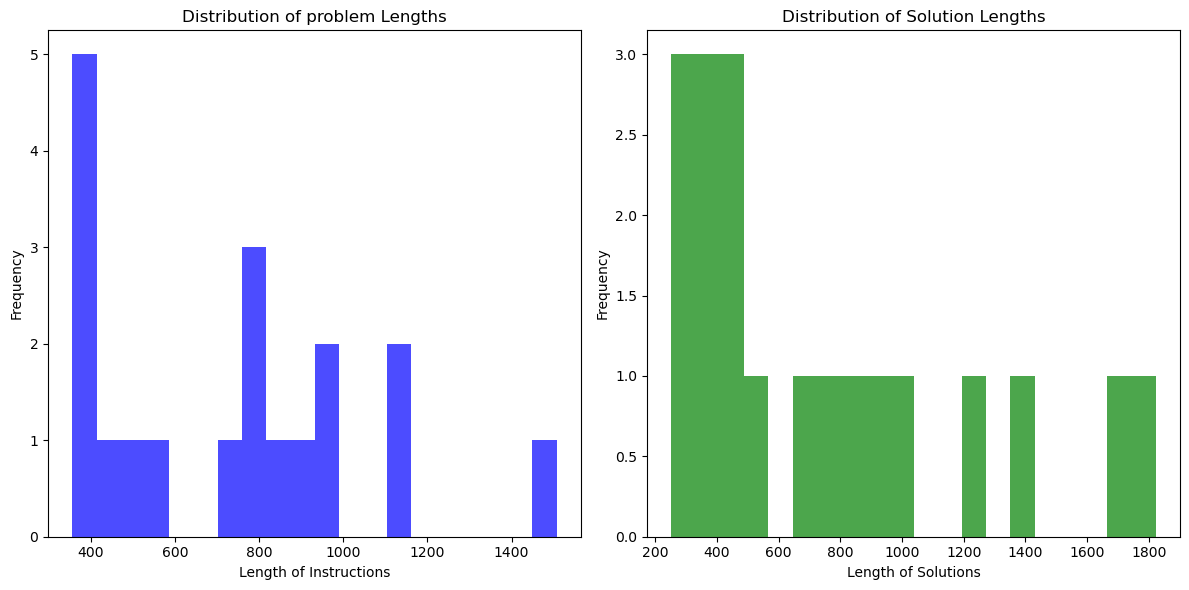

In [77]:
data['problem_length'] = data['problem'].apply(len)
data['solution_length'] = data['solution'].apply(len)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data['problem_length'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Length of Instructions')
plt.ylabel('Frequency')
plt.title('Distribution of problem Lengths')

plt.subplot(1, 2, 2)
plt.hist(data['solution_length'], bins=20, color='green', alpha=0.7)
plt.xlabel('Length of Solutions')
plt.ylabel('Frequency')
plt.title('Distribution of Solution Lengths')

plt.tight_layout()
plt.show()

### Distribution of Lines of Code in Solutions

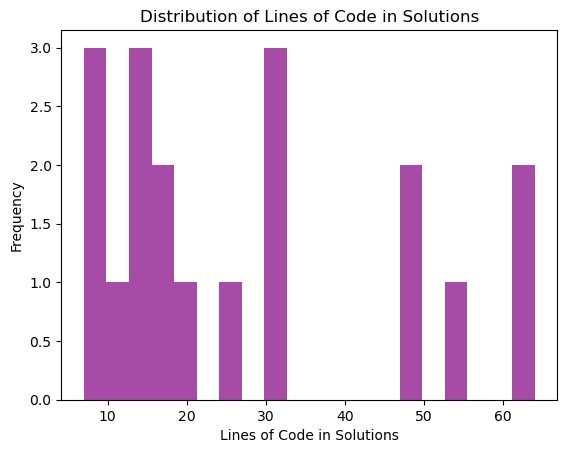

In [78]:
data['lines_of_code'] = data['solution'].apply(lambda x: x.count('\n') + 1)
plt.hist(data['lines_of_code'], bins=20, color='purple', alpha=0.7)
plt.xlabel('Lines of Code in Solutions')
plt.ylabel('Frequency')
plt.title('Distribution of Lines of Code in Solutions')
plt.show()

### Checking the most common words in problem descriptions - extracting tokens and phrases

In [79]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

def extract_phrases(tokens, min_df=1, max_df=1.0, ngram_range=(1, 3)):
    if not tokens:
        return []
    vectorizer = CountVectorizer(min_df=min_df, max_df=max_df, ngram_range=ngram_range)
    try:
        phrases = vectorizer.fit_transform([' '.join(tokens)])
        return vectorizer.get_feature_names_out()
    except ValueError:
        return []

In [80]:
data['problem_tokens'] = data['problem'].apply(preprocess_text)
data['problem_phrases'] = data['problem_tokens'].apply(lambda tokens: extract_phrases(tokens))


In [81]:
data[['problem', 'problem_phrases']]

problem  \
0   In this exercise, you will change the Hello pr...   
1   If you have n eggs, then you have n/12 dozen e...   
2   The area of a regular polygon is\nArea =\n1/4 ...   
3   The fixed monthly payment for a fixed rate mor...   
4   Many countries tax annual income using tax bra...   
5   Write a program NumberGuesser in package ss.we...   
6   One method to estimate the value of π uses ran...   
7   A prime number is a number greater than 1 that...   
8   The Fibonacci numbers form a famous sequence o...   
9   Solving bugs is a common task of a programmer....   
10  Write a program that asks the user for a word,...   
11  Write a program SplitNumbers that reads a line...   
12  An emirp is a prime number that results in a d...   
13  Write unit tests for the ThreeWayLamp class ba...   
14  Reimplement the merge sort algorithm. Below yo...   
15  Complete the implementation of BasicPassword a...   
16  Write an interface ss.hotel.password.Checker w...   
17  Write two classes that implement the Checker i...   
18  Copy the class ss.hotel.password.BasicPassword...   

                                      problem_phrases  
0   [accomplish, accomplish following, accomplish ...  
1   [asks, asks user, asks user many, definition, ...  
2   [area, area cotπn, area cotπn ns, area nsided,...  
3   [also, also called, also called principal, amo...  
4   [annual, annual income, annual income using, a...  
5   [ask, ask user, ask user gives, ask user guess...  
6   [afterwards, afterwards estimate, afterwards e...  
7   [add, add description, add description javadoc...  
8   [asks, asks user, asks user input, asks user i...  
9   [alternative, alternative implementation, alte...  
10  [asks, asks user, asks user word, digits, digi...  
11  [array, array ints, array ints first, characte...  
12  [add, add javadoc, add javadoc method, algorit...  
13  [also, also appendix, also appendix test, anno...  
14  [algorithm, algorithm find, algorithm find pse...  
15  [acceptable, acceptable update, acceptable upd...  
16  [acceptable, acceptable string, acceptable str...  
17  [acceptable, acceptable checks, acceptable che...  
18  [acceptable, acceptable class, acceptable clas...

### Counting the frequencies of tokens and phrases

In [82]:
def count_token_frequencies(tokens):
    token_counts = Counter(tokens)
    return token_counts

def count_phrase_frequencies(phrases):
    phrase_counts = Counter(phrases)
    return phrase_counts

In [83]:
data['problem_token_counts'] = data['problem_tokens'].apply(count_token_frequencies)
data['problem_phrase_counts'] = data['problem_phrases'].apply(count_phrase_frequencies)

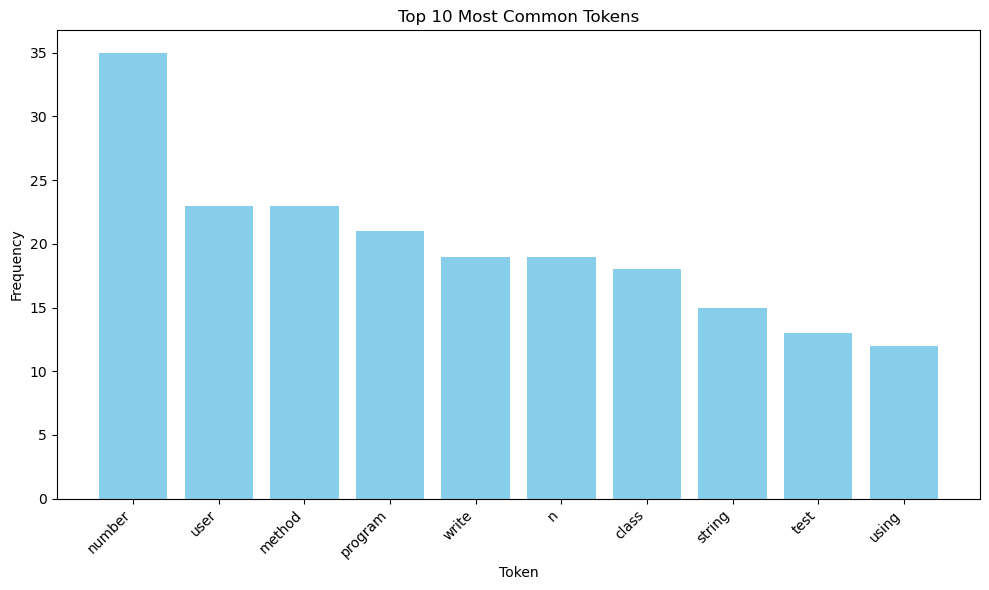

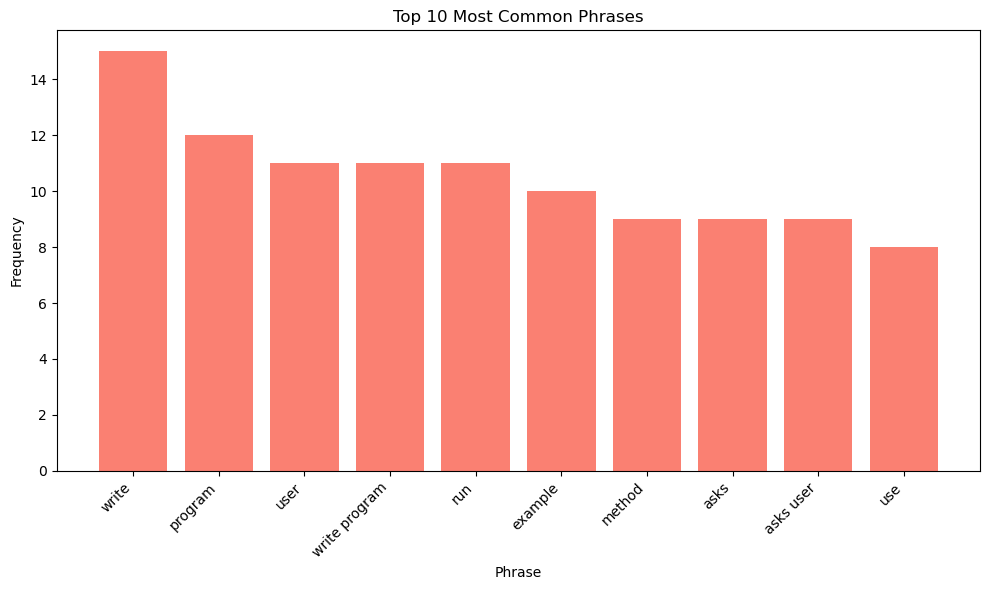

In [84]:
# Aggregate token and phrase counts across all data points
all_token_counts = Counter()
all_phrase_counts = Counter()

for i in range(len(data)):
    all_token_counts += data['problem_token_counts'][i]
    all_phrase_counts += data['problem_phrase_counts'][i]

top_10_tokens = all_token_counts.most_common(10)
top_10_phrases = all_phrase_counts.most_common(10)

token_df = pd.DataFrame(top_10_tokens, columns=['Token', 'Frequency'])
plt.figure(figsize=(10, 6))
plt.bar(token_df['Token'], token_df['Frequency'], color='skyblue')
plt.title('Top 10 Most Common Tokens')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

phrase_df = pd.DataFrame(top_10_phrases, columns=['Phrase', 'Frequency'])
plt.figure(figsize=(10, 6))
plt.bar(phrase_df['Phrase'], phrase_df['Frequency'], color='salmon')
plt.title('Top 10 Most Common Phrases')
plt.xlabel('Phrase')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
